In [12]:
import sys
import os
sys.path.append('/home/tpopova/prj/PB_SCF')

from py_utils.generate_pore_in_files import generate_pore_in_files
from pore_main.pore_utils import pore_utils


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
N = 300
S = 150
alpha = 0.5
D = 150
chi = 0.5

cs_range = np.linspace(0.001, 0.01, num = 7)

In [14]:
files_name_pro = []
for cs in cs_range:
    file_name_pro = generate_pore_in_files(template_pore = '/home/tpopova/prj/PB_SCF/pore_templates/pore_template.in',
                        
                        #название параметра
                        range_param = 'cs',

                        N_brush = N,
                        S = S,
                        Cs = cs,
                        alpha = alpha,
                        D = D,
                        min_range_value = 1,
                        max_range_value = 1,
                        
                        chi = chi)
    files_name_pro.append(file_name_pro)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.503531e+00 |g| = 7.144892e+00 alpha = 1.000000e+00 
hessian scaling: 2.64913
it =  1  E = 2.193074e+00 |g| = 6.030992e+00 alpha = 1.139960e-01 
it =  2  E = 1.724182e+00 |g| = 6.095675e+00 alpha = 1.756024e-01 
it =  3  E = 6.255825e+00 |g| = 5.739566e+00 alpha = 1.161584e-02 
it =  4  E = 2.622314e+00 |g| = 5.759597e+00 alpha = 6.190218e-02 
it =  5  E = 1.856859e+01 |g| = 5.516325e+00 alpha = 1.104683e-03 
it =  6  E = 2.636837e+00 |g| = 5.574776e+00 alpha = 5.208806e-02 
it =  7  E = 6.270809e+00 |g| = 5.742690e+00 alpha = 1.009731e-02 
it =  8  E = 3.512893e+00 |g| = 5.815079e+00 alpha = 3.069700e-02 
it =  9  E = 6.143580e+00 |g| = 5.913511e+00 alpha = 1.084741e-02 
it =  10  E = 5.140250e+00 |g| = 5.942371e+00

<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2065303/1916715596.py:21: SyntaxWarning: invalid escape sequence '\p'
  axs1.set_ylabel("$\phi(r)$",


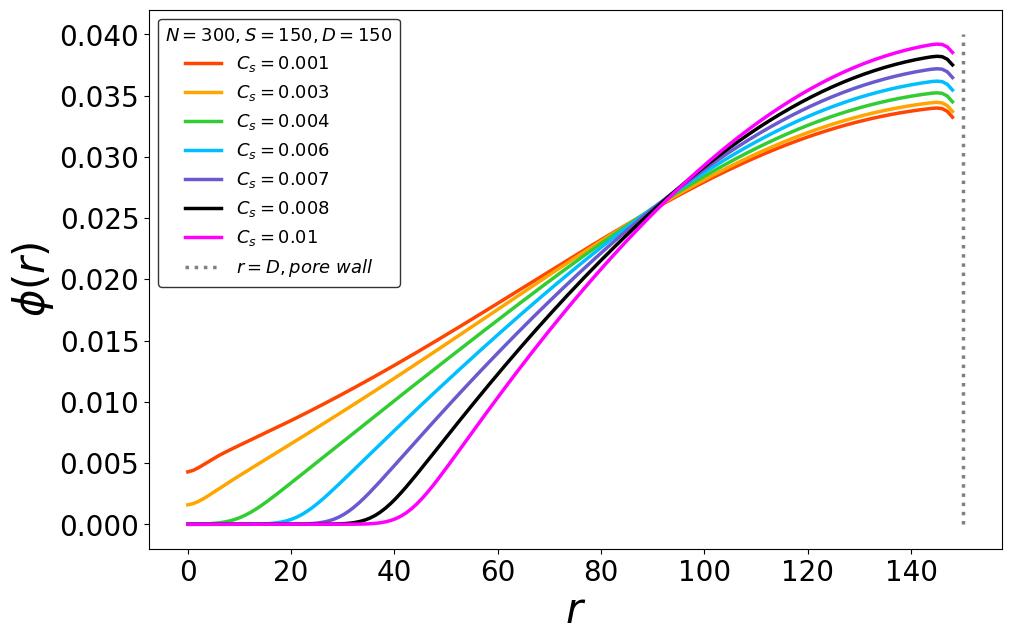

In [17]:
colors  = ['orangered', 'orange','limegreen', 'deepskyblue', 'slateblue', 'black', 'fuchsia']

fig, axs1 = plt.subplots(nrows = 1, ncols = 1)

for cs, color, file in zip(cs_range, colors, files_name_pro):
    
    #Получаю профиль потенциала SCF
    phi_namics = np.asarray(pd.read_csv(file, sep='\t')['mol_pol_phi'])[0:D-2]

    r_range = np.linspace(0, D-2, num = D-2)

    #ГРАФИК
    
    axs1.plot(r_range, phi_namics, linestyle = '-',
            linewidth = 2.5, color = color, label = f"$C_s = {round(cs, 3)}$")
    

axs1.plot(np.linspace(D, D, num = 20), np.linspace(0, 0.04, num = 20), linestyle = ':',
linewidth = 2.5,  color = 'gray',label = f'$r = D, pore \\ wall$')

axs1.set_ylabel("$\phi(r)$",
        fontsize = 30,
        color = 'black', 
        labelpad = 2.5)
        

axs1.set_xlabel("$r$",
        fontsize = 30,
        color = 'black', 
        labelpad = 2.5)

axs1.legend(title = f'$N = {N} , S = {S}, D = {D}$',
    fontsize = 13, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '13', 
        loc = 'upper left')

fig.set_figwidth(11)
fig.set_figheight(7)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

# fig.savefig('2D_phi_range_Cs.svg', dpi = 400)

<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2065303/2621713134.py:21: SyntaxWarning: invalid escape sequence '\p'
  axs1.set_ylabel("$\phi(r) ends$",


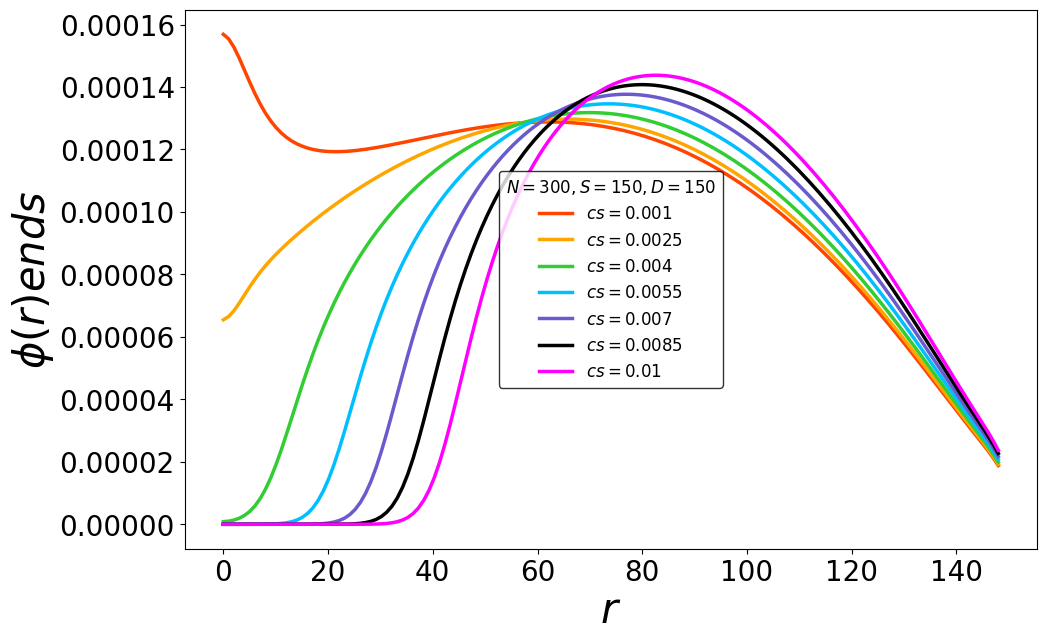

In [16]:
colors = ['orangered', 'orange','limegreen', 'deepskyblue', 'slateblue', 'black', 'fuchsia']

fig, axs1 = plt.subplots(nrows = 1, ncols = 1)

for cs, color, file in zip(cs_range, colors, files_name_pro):
    
    #Получаю профиль потенциала SCF
    phi_namics = np.asarray(pd.read_csv(file, sep='\t')['mon_E_phi'])[0:D-2]

    r_range = np.linspace(0, D-2, num = D-2)

    #ГРАФИК
    
    axs1.plot(r_range, phi_namics, linestyle = '-',
            linewidth = 2.5, color = color, label = f"$cs = {round(cs, 4)}$")
    

# axs1.plot(np.linspace(D, D, num = 20), np.linspace(0, 0.04, num = 20), linestyle = ':',
# linewidth = 2.5,  color = 'gray',label = f'$r = D, pore \\ wall$')

axs1.set_ylabel("$\phi(r) ends$",
        fontsize = 30,
        color = 'black', 
        labelpad = 2.5)
        

axs1.set_xlabel("$r$",
        fontsize = 30,
        color = 'black', 
        labelpad = 2.5)

axs1.legend(title = f'$N = {N} , S = {S}, D = {D}$',
    fontsize = 12, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '12', 
        loc = 'center')

fig.set_figwidth(11)
fig.set_figheight(7)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

# fig.savefig('2D_phi_range_Cs.svg', dpi = 400)